In [77]:
import numpy as np
import pandas as pd
import seaborn as sns

In [78]:
df_penguins = pd.read_csv("/home/rawan/Portfolios/palmer_penguins_EDA/Palmer_penguins_EDA/penguins_lter.csv")

In [79]:
df_penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [80]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [81]:
df_penguins.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [82]:
df_penguins['Species'].value_counts()              

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [83]:
df_penguins.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [84]:
df_penguins.duplicated().sum()

0

In [85]:
df_penguins.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

##### Handling Missing values

In [86]:
df_penguins[df_penguins['Body Mass (g)'].isnull()]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Missing body mass replaced with the mean body mass for that species 

In [87]:
df_penguins.groupby('Species')['Body Mass (g)'].mean()

Species
Adelie Penguin (Pygoscelis adeliae)          3700.662252
Chinstrap penguin (Pygoscelis antarctica)    3733.088235
Gentoo penguin (Pygoscelis papua)            5076.016260
Name: Body Mass (g), dtype: float64

In [88]:
df_penguins['Body Mass (g)'] = df_penguins.groupby('Species')['Body Mass (g)'].transform(lambda x: x.fillna(x.mean()))

- Missing Culmen Length replaced with the mean body mass for that species 

In [89]:
df_penguins.groupby('Species')['Culmen Length (mm)'].mean()

Species
Adelie Penguin (Pygoscelis adeliae)          38.791391
Chinstrap penguin (Pygoscelis antarctica)    48.833824
Gentoo penguin (Pygoscelis papua)            47.504878
Name: Culmen Length (mm), dtype: float64

In [90]:
df_penguins['Culmen Length (mm)'] = df_penguins.groupby('Species')['Culmen Length (mm)'].transform(lambda x: x.fillna(x.mean()))

- Missing Culmen Depth replaced with the mean body mass for that species 

In [91]:
df_penguins.groupby('Species')['Culmen Depth (mm)'].mean()

Species
Adelie Penguin (Pygoscelis adeliae)          18.346358
Chinstrap penguin (Pygoscelis antarctica)    18.420588
Gentoo penguin (Pygoscelis papua)            14.982114
Name: Culmen Depth (mm), dtype: float64

In [92]:
df_penguins['Culmen Depth (mm)'] = df_penguins.groupby('Species')['Culmen Depth (mm)'].transform(lambda x: x.fillna(x.mean()))

- Missing Flipper Length replaced with the mean body mass for that species 

In [93]:
df_penguins.groupby('Species')['Flipper Length (mm)'].mean()

Species
Adelie Penguin (Pygoscelis adeliae)          189.953642
Chinstrap penguin (Pygoscelis antarctica)    195.823529
Gentoo penguin (Pygoscelis papua)            217.186992
Name: Flipper Length (mm), dtype: float64

In [94]:
df_penguins['Flipper Length (mm)'] = df_penguins.groupby('Species')['Flipper Length (mm)'].transform(lambda x: x.fillna(x.mean()))

In [95]:
df_penguins.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

- Missing Sex replaced with the mode 

In [111]:
df_penguins.groupby(['Species', 'Sex']).agg({'Culmen Length (mm)':'mean', 'Flipper Length (mm)':'mean'})

Culmen Length (mm)  \
Species                                   Sex                          
Adelie Penguin (Pygoscelis adeliae)       FEMALE           37.257534   
                                          MALE             40.208752   
Chinstrap penguin (Pygoscelis antarctica) FEMALE           46.573529   
                                          MALE             51.094118   
Gentoo penguin (Pygoscelis papua)         .                44.500000   
                                          FEMALE           45.563793   
                                          MALE             49.283152   

                                                  Flipper Length (mm)  
Species                                   Sex                          
Adelie Penguin (Pygoscelis adeliae)       FEMALE           187.794521  
                                          MALE             191.948780  
Chinstrap penguin (Pygoscelis antarctica) FEMALE           191.735294  
                                          MALE             199.911765  
Gentoo penguin (Pygoscelis papua)         .                217.000000  
                                          FEMALE           212.706897  
                                          MALE             221.187492

- Notice : one of the Gentoo penguin (Pygoscelis papua)	record have a . instead of a value that affect the vualiasation and the counting

In [115]:
#df_penguins[df_penguins.Species == "Gentoo penguin (Pygoscelis papua)"]
df_penguins.groupby('Sex').agg({'Sex':'count'})

,Sex
Sex,
.,1
FEMALE,165
MALE,178


In [117]:
df_penguins[df_penguins.Sex == "."]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
336,PAL0910,117,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N36A1,Yes,12/1/09,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444,NaN


In [122]:
df_penguins['Sex'] = df_penguins.Sex.replace('.','MALE')

In [123]:
# How many Female and Male penguins?
df_penguins.Sex.value_counts() 

MALE      179
FEMALE    165
Name: Sex, dtype: int64

In [98]:
li= df_penguins[df_penguins.Species == 'Adelie Penguin (Pygoscelis adeliae)'].Sex
li.value_counts()

MALE      73
FEMALE    73
Name: Sex, dtype: int64

In [99]:
li= df_penguins[df_penguins.Species == 'Gentoo penguin (Pygoscelis papua)'].Sex
li.mode()

0    MALE
dtype: object

In [100]:
df_penguins.Sex.mode()

0    MALE
dtype: object

In [101]:
df_penguins['Sex'].fillna(df_penguins.Sex.mode()[0], inplace=True)

In [102]:
df_penguins.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                      0
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [103]:
df_penguins.Sex.value_counts() 

MALE      178
FEMALE    165
.           1
Name: Sex, dtype: int64

- The mean Body mass for each Species and Sex 

In [104]:
df_penguins.groupby(['Sex', 'Species'])['Body Mass (g)'].mean()

Sex     Species                                  
.       Gentoo penguin (Pygoscelis papua)            4875.000000
FEMALE  Adelie Penguin (Pygoscelis adeliae)          3368.835616
        Chinstrap penguin (Pygoscelis antarctica)    3527.205882
        Gentoo penguin (Pygoscelis papua)            4679.741379
MALE    Adelie Penguin (Pygoscelis adeliae)          4007.286864
        Chinstrap penguin (Pygoscelis antarctica)    3938.970588
        Gentoo penguin (Pygoscelis papua)            5432.707942
Name: Body Mass (g), dtype: float64

- The mean Flipper Length for each Species and Sex 

In [105]:
df_penguins.groupby(['Sex', 'Species'])['Flipper Length (mm)'].mean()

Sex     Species                                  
.       Gentoo penguin (Pygoscelis papua)            217.000000
FEMALE  Adelie Penguin (Pygoscelis adeliae)          187.794521
        Chinstrap penguin (Pygoscelis antarctica)    191.735294
        Gentoo penguin (Pygoscelis papua)            212.706897
MALE    Adelie Penguin (Pygoscelis adeliae)          191.948780
        Chinstrap penguin (Pygoscelis antarctica)    199.911765
        Gentoo penguin (Pygoscelis papua)            221.187492
Name: Flipper Length (mm), dtype: float64

##### Data Visualisation 

/home/rawan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


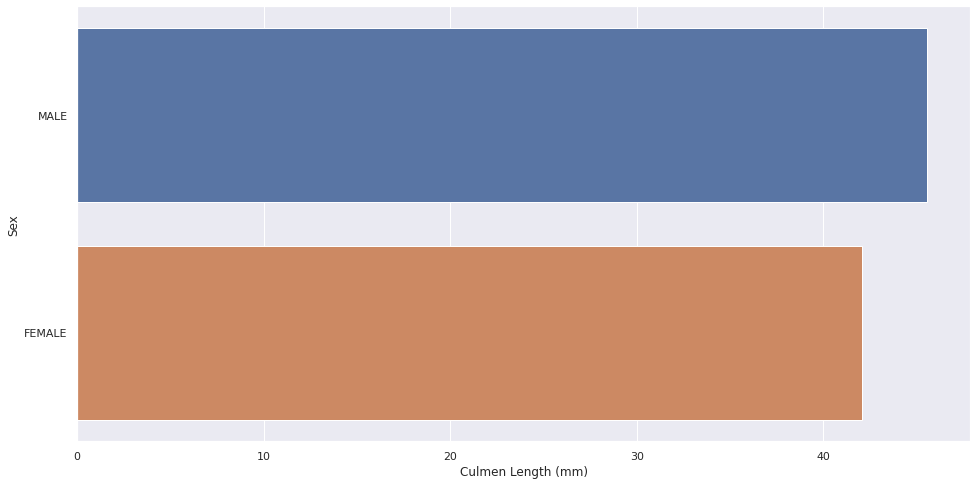

In [124]:
sns.set(font_scale=1.5)
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 16, 8

sns.set_theme(style="darkgrid")
sns.barplot('Culmen Length (mm)','Sex', data=df_penguins, ci=None);

/home/rawan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


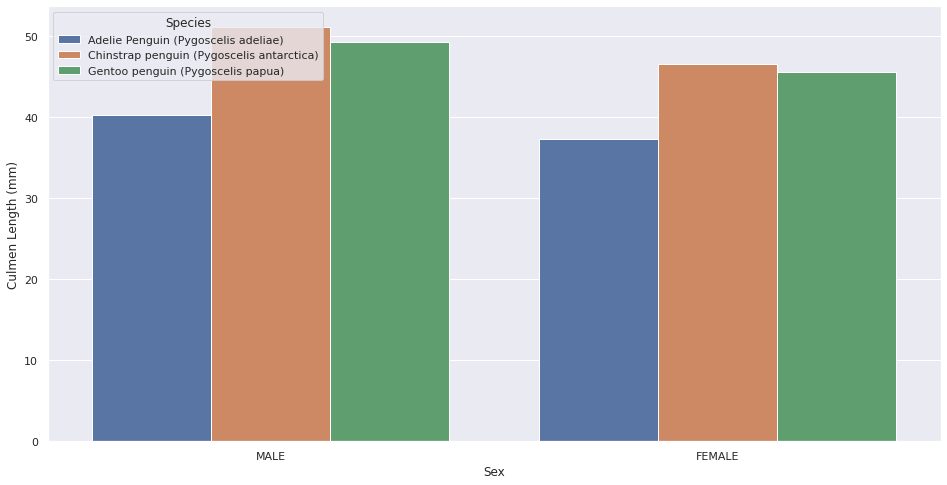

In [125]:
sns.set(font_scale=1.5)
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 16, 8

sns.set_theme(style="darkgrid")
sns.barplot('Sex','Culmen Length (mm)','Species', data=df_penguins, ci=None);

/home/rawan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


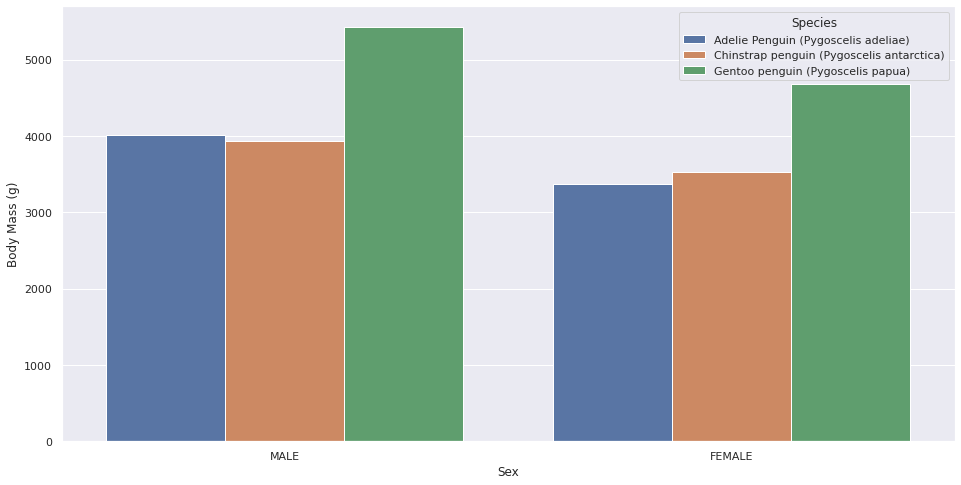

In [126]:
sns.set(font_scale=1.5)
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 16, 8

sns.set_theme(style="darkgrid")
sns.barplot('Sex','Body Mass (g)','Species', data=df_penguins, ci=None);